# Data Analysis and Exploration

## New Customer vs Old Customer Age Distribution

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

In [120]:
# Loading new customer dataset

new_cust = pd.read_csv('NewCustomers_cleaned.csv')
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,Age Group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53,60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44,50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58,60


Text(0.5, 1.0, 'Age Group Distribution of New Customers')

<Figure size 1000x800 with 0 Axes>

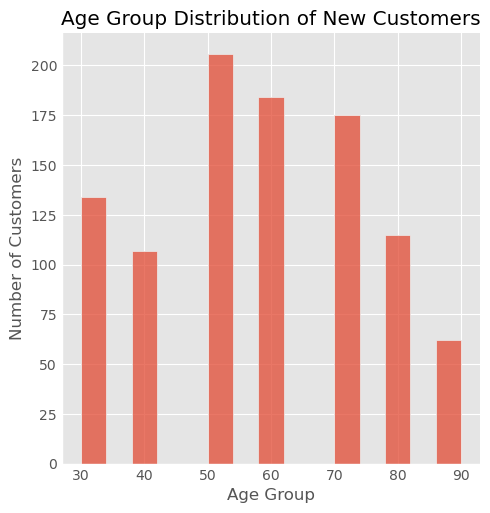

In [121]:
plt.figure(figsize=(10,8))
sns.displot(new_cust['Age Group'], bins=15, kde=False)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Age Group Distribution of New Customers')

Most New Customers are aged between 40-49. The lowest age groups are under 20 - 29.
There is a steep drop in number of customers in 30-39 age groupsd among the New Customers.

In [122]:
# Loading existing customer dataset

old_cust = pd.read_csv('Customer_Transactions_RFM.csv')
old_cust.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,Age_group,cust_detail_title,rank
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,7,4179.11,3,3,4,334,Gold,50,Potential Customer,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,7,4179.11,3,3,4,334,Gold,50,Potential Customer,5


Text(0.5, 1.0, 'Age Group Distribution of Existing Customers')

<Figure size 1000x800 with 0 Axes>

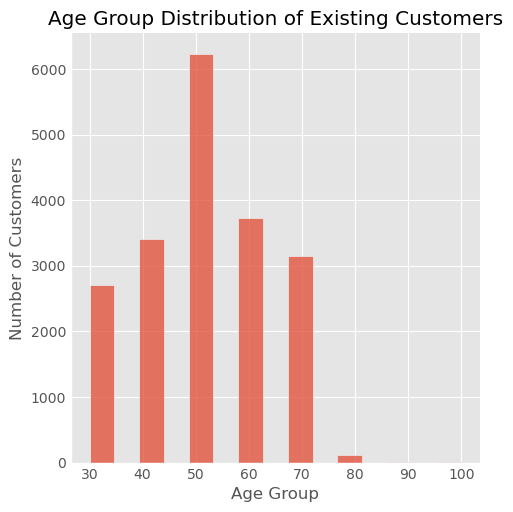

In [123]:
plt.figure(figsize=(10,8))
sns.displot(old_cust['Age_group'], bins=15, kde=False)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Age Group Distribution of Existing Customers')

In old customers also, most of the customers are in the age group 50 - 59 followed by age group 60 - 69

## Bike related purchases over last 3 years by gender

In [124]:
cust_bike_purchase_by_gender = old_cust.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}).reset_index()

In [125]:
total_records = old_cust['past_3_years_bike_related_purchases'].sum()

In [126]:
cust_bike_purchase_by_gender['Percent_Total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']/total_records) * 100
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_Total
0,Female,478488,50.503731
1,Male,468943,49.496269


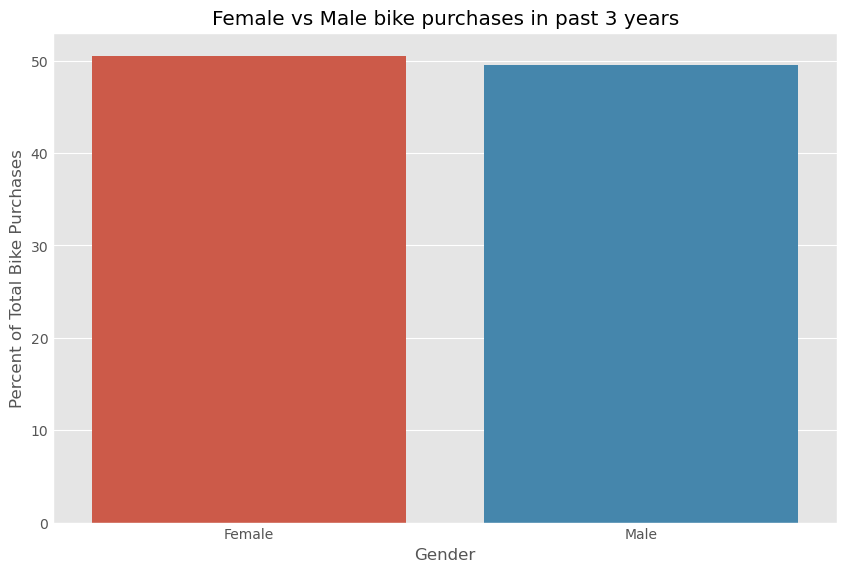

In [127]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='Percent_Total', data=cust_bike_purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Bike Purchases')
plt.title('Female vs Male bike purchases in past 3 years')

plt.show()

Over the last 3 years approximately 50.5% of the buyers are women and 49.5% were male buyers.
Female purchases are approximately 10,000 more than male (numerically). Bike sales are equally distributed gender wise.

## Job Industry Customer Distribution


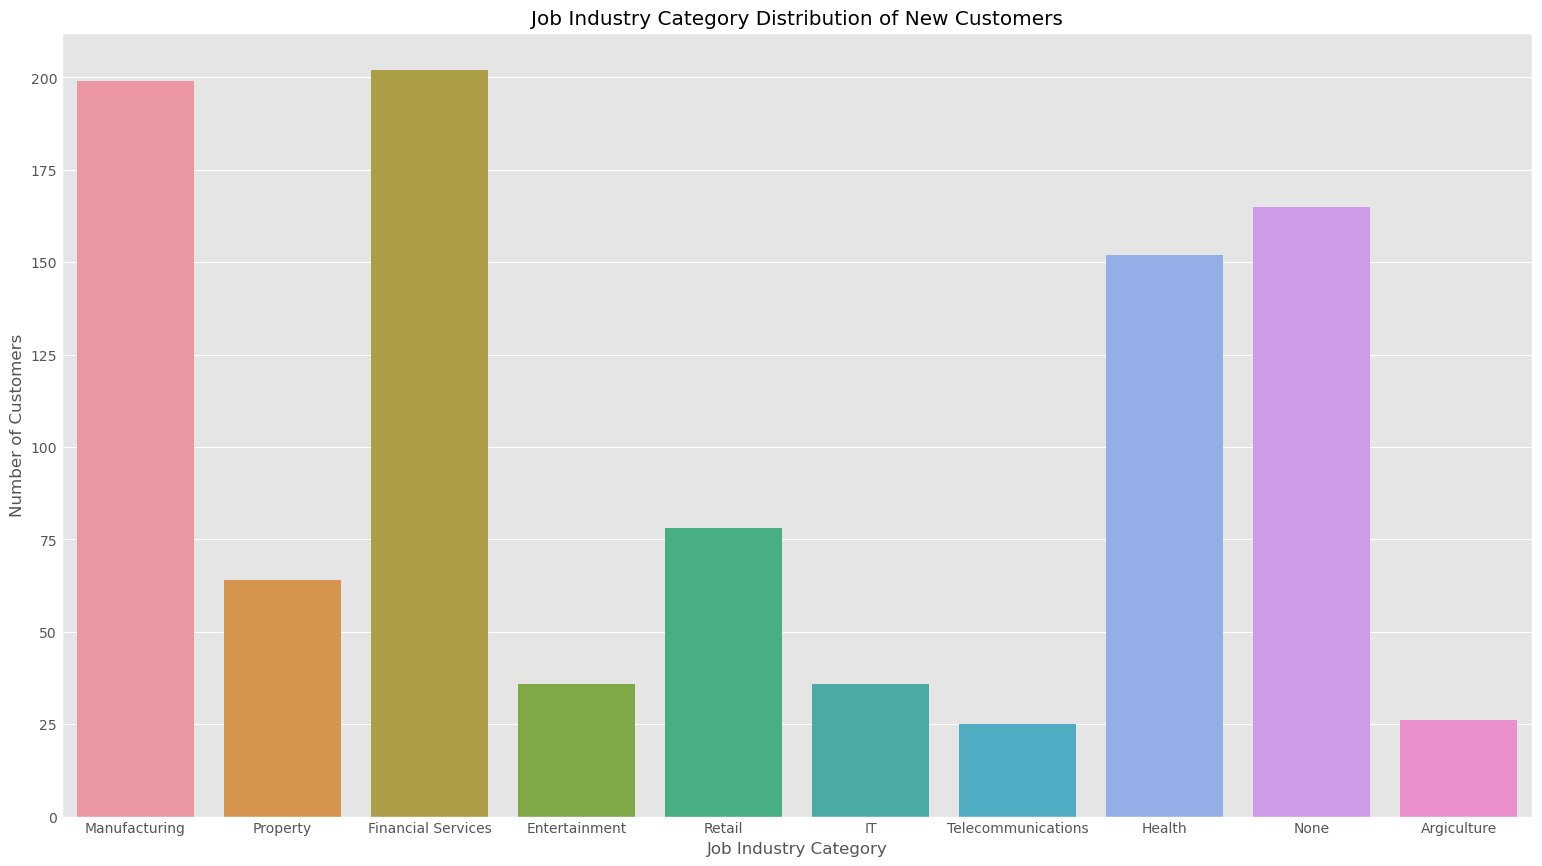

In [128]:
plt.figure(figsize=(15, 8))
sns.countplot(x='job_industry_category', data=new_cust[~(new_cust['job_industry_category'] == 'Missing')])
plt.xlabel('Job Industry Category')
plt.ylabel('Number of Customers')
plt.title('Job Industry Category Distribution of New Customers')
plt.show()

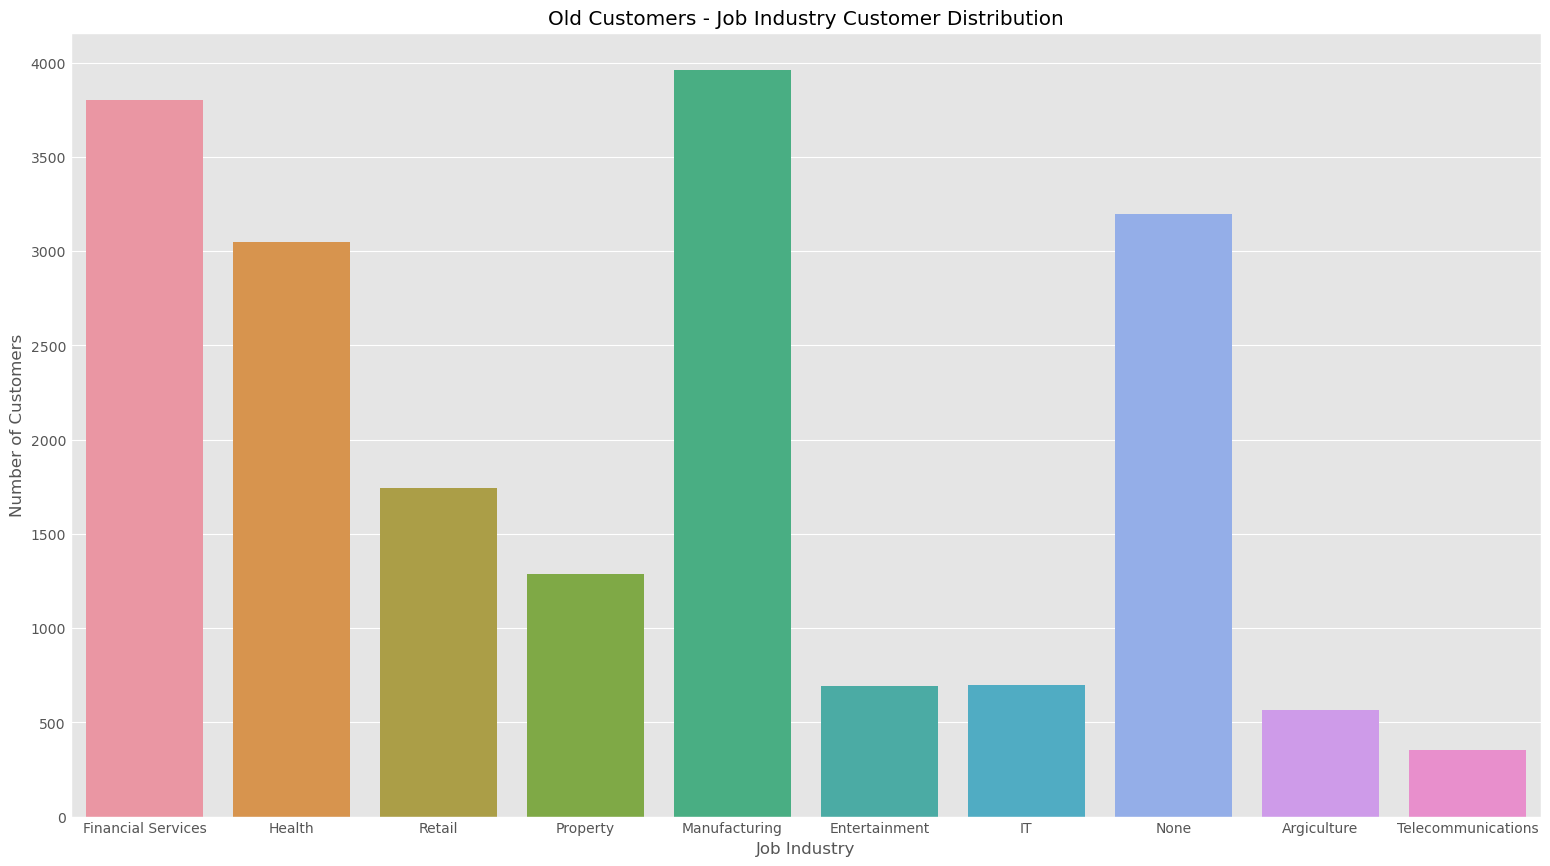

In [129]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=old_cust[~(old_cust['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')

plt.show()

Among the New `Customers` the highest amount of sales comes from customers having a job in Manufacturing and Financial services sector. The smallest chunk of sales comes from customers in Agriculture sector and from Telecom sector with 3% sales only. Similar trend is observed among `Old Customers`.

## Wealth Segmentation

`New Customers`

In [130]:
wealth_segment_new = new_cust.groupby(['wealth_segment', 'Age Group']).size().reset_index()

In [131]:
wealth_segment_new.rename(columns={0: 'Number of Customers'}, inplace=True)
wealth_segment_new

,wealth_segment,Age Group,Number of Customers
0,Affluent Customer,30,41
1,Affluent Customer,40,20
2,Affluent Customer,50,51
3,Affluent Customer,60,45
4,Affluent Customer,70,35
5,Affluent Customer,80,30
6,Affluent Customer,90,13
7,High Net Worth,30,30
8,High Net Worth,40,34
9,High Net Worth,50,52


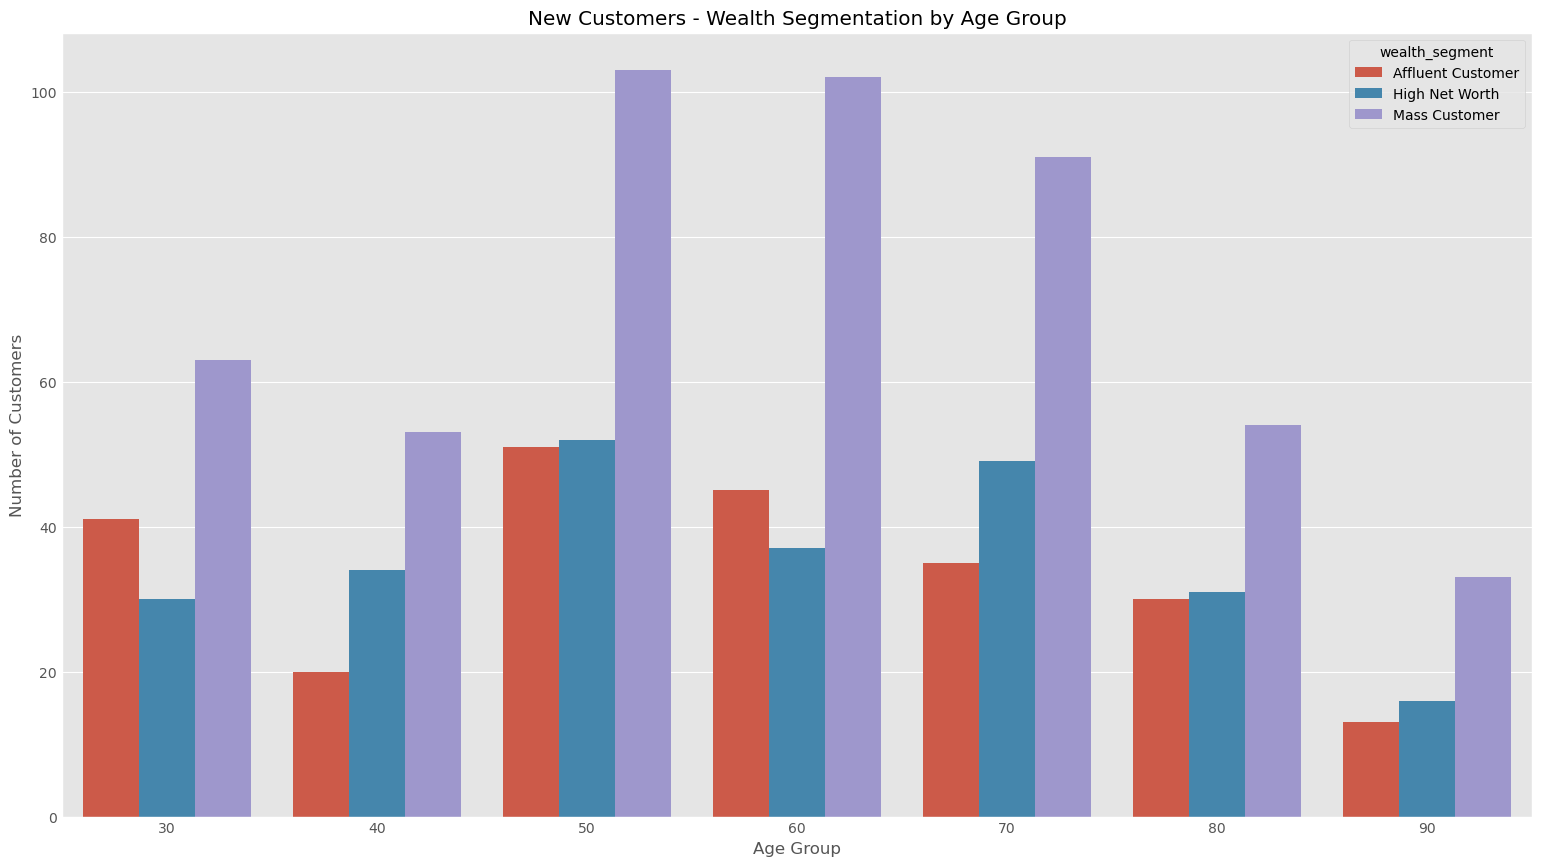

In [132]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age Group', y='Number of Customers' , hue='wealth_segment', data=wealth_segment_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

* Across all Age Groups the maximum number of customers are classified as 'Mass Customers'. The next being 'High Net Worth'. However among 40-49 aged customers 'Affluent Customers' outperforms the 'High Net Worth' customers.
* In all the age groups the most number of customers are 'Mass Customers'. The 2nd largest customer base being the 'High Net Worth' group.
In the age group 40-49 the 'Affluent Customer' group outperforms 'High Net Worth' group

`Old Customers`

In [133]:
wealth_segment_old = old_cust.groupby(['wealth_segment', 'Age_group']).size().reset_index()

In [134]:
wealth_segment_old.rename(columns={0: 'Number of Customers'}, inplace=True)
wealth_segment_old

,wealth_segment,Age_group,Number of Customers
0,Affluent Customer,30,775
1,Affluent Customer,40,803
2,Affluent Customer,50,1436
3,Affluent Customer,60,918
4,Affluent Customer,70,742
5,Affluent Customer,80,36
6,Affluent Customer,100,10
7,High Net Worth,30,602
8,High Net Worth,40,907
9,High Net Worth,50,1657


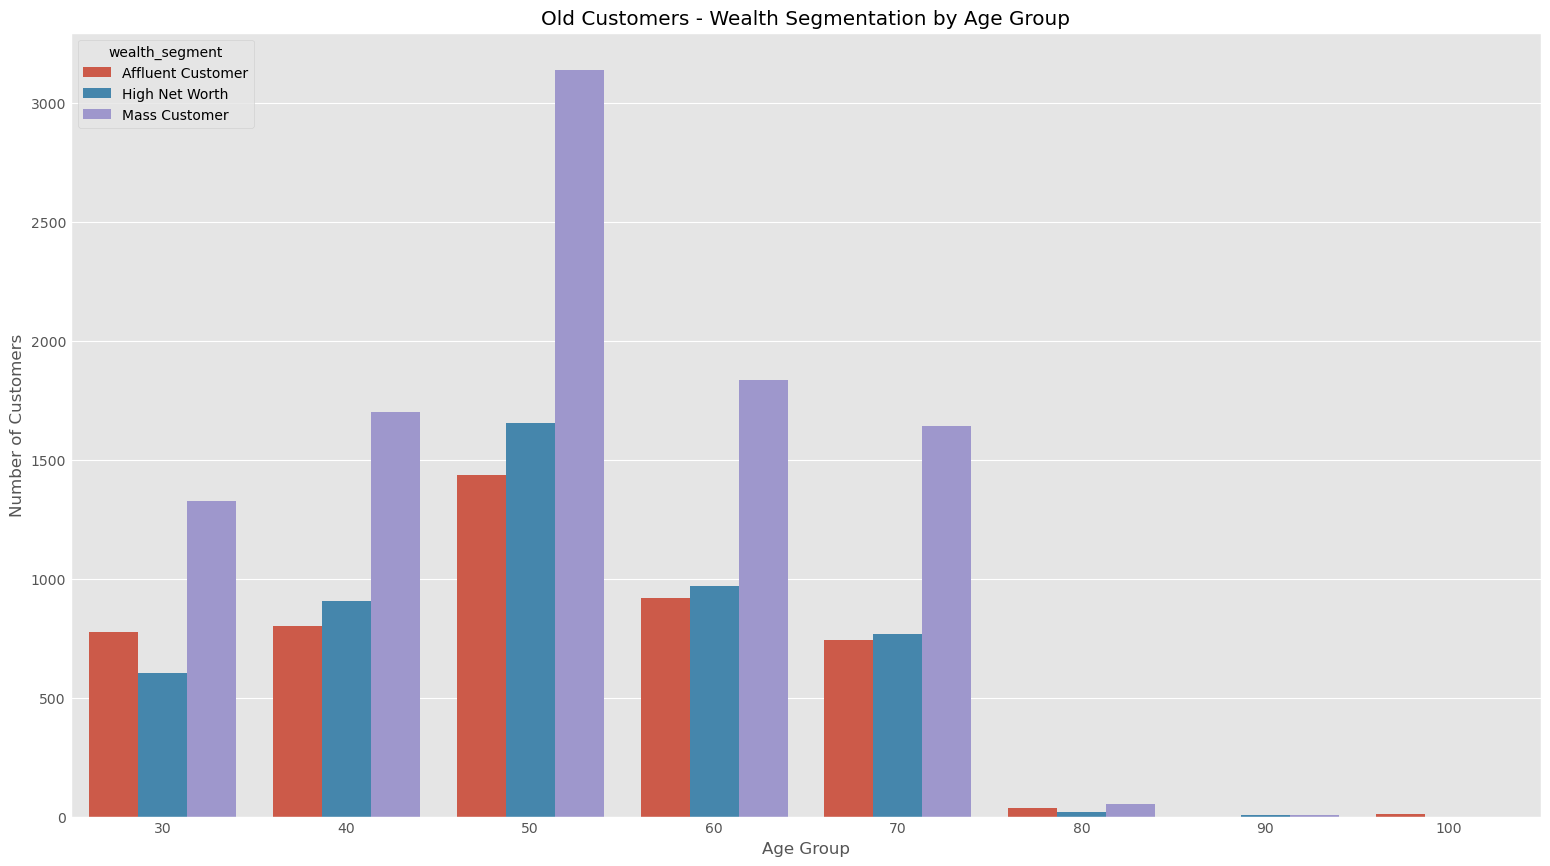

In [135]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age_group', y='Number of Customers' , hue='wealth_segment', data=wealth_segment_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')
plt.show()

## Car Owner across each state

In [136]:
# Loading the customer address dataset

cust_addr_info = pd.read_csv('CustomerAddress_cleaned.csv')
cust_addr_info.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [137]:
# Merging the RFM data with the customer address data

cust_trans_addr = pd.merge(old_cust, cust_addr_info, left_on='customer_id', right_on='customer_id', how='inner')

In [138]:
print(f'RFM Table records count: {old_cust.shape[0]}\nAddress table Records count: {cust_addr_info.shape[0]}')

RFM Table records count: 19354
Address table Records count: 3999


In [139]:
state_car_owners = cust_trans_addr[['state', 'owns_car', 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


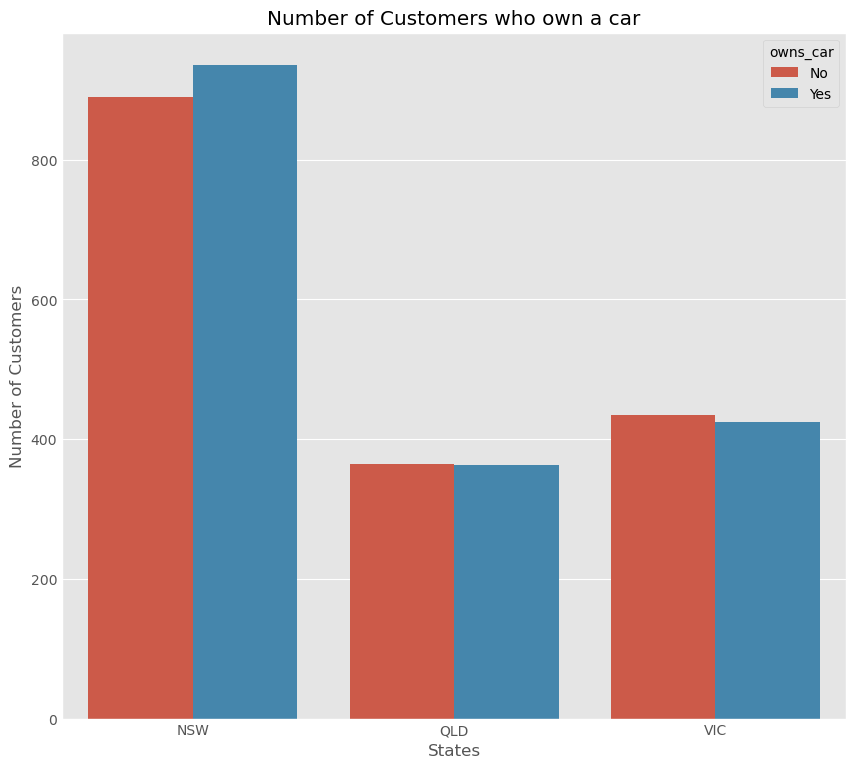

In [140]:
plt.figure(figsize=(8,7))
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners)
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.show()

* The customer base of the automobile bike company lies in New South Wales, Queensland and Victoria, Australia.
In New South Wales (NSW) it seems there is a greater amount of people who donot own a car. In Victoria (VIC) the proportion is evenly split. However in Queensland (QLD) there are relatively more people who own the car.
* NSW has the largest number of people that donot own a car. It seems that a higher amount of data is collected from NSW compared to other states. In QLD the distribution between customers having a car or not having is even. In Victoria the number is split evenly. Both the numbers are significantly lower than that of NSW

## RFM Analysis Scatter Plots

### Recency vs Monetary

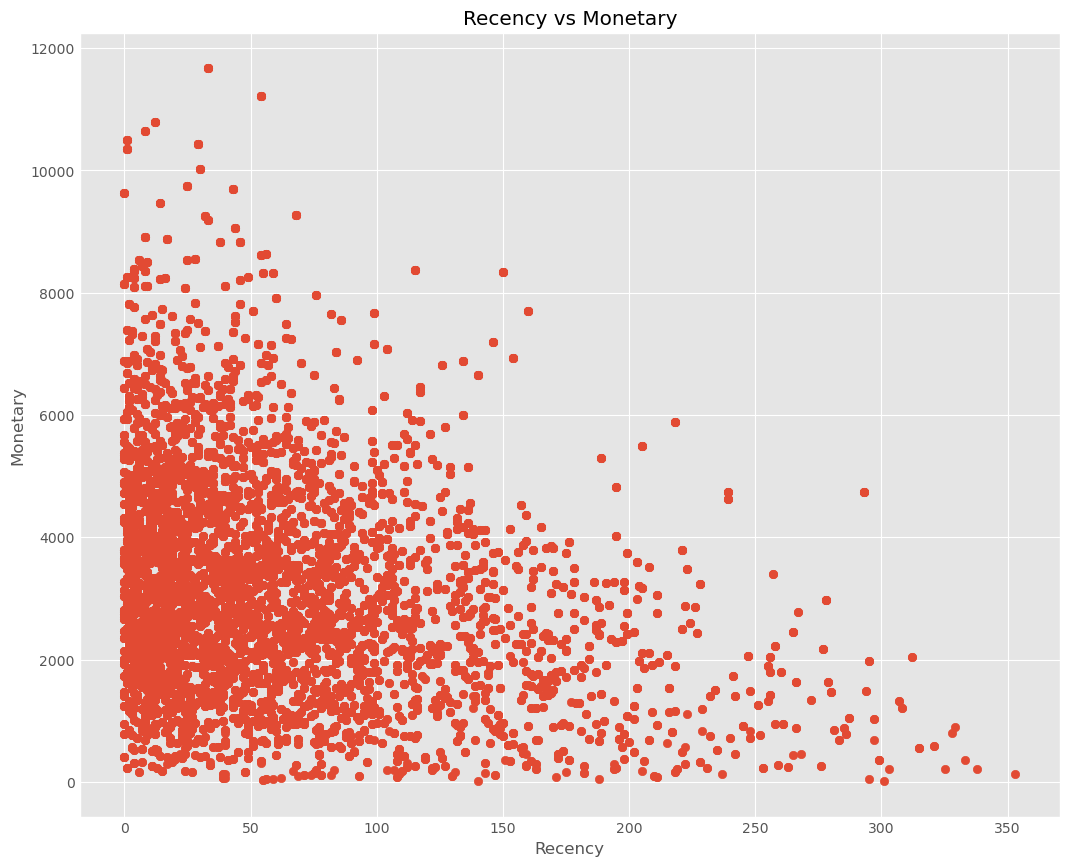

In [143]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x='recency', y='monetary', data=cust_trans_addr)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')
plt.show()


The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

### Frequency vs Monetary

<Figure size 800x500 with 0 Axes>

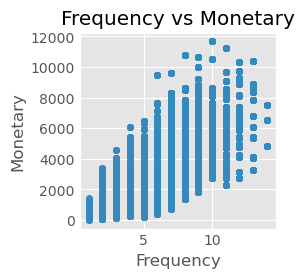

In [149]:
plt.figure(figsize=(8,5))
cust_trans_addr.plot.scatter(x='frequency', y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')
plt.show()


Customers classified as "Platinum Custoers" , "Very Loyal" and "Becoming Loyal" visit frequently, which correlated with increased revenue for the business.

## Customer Segmentation and Distribution

In [160]:
cust_per_title = cust_trans_addr[['customer_id', 'rank', 'cust_detail_title']].drop_duplicates().groupby(['rank', 'cust_detail_title']).size().reset_index().sort_values(by='rank', ascending=True)

cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,rank,cust_detail_title,Number of Customers
0,1,Platinum Customer,164
1,2,Very Loyal,181
2,3,Becoming Loyal,343
3,4,Recent Customer,357
4,5,Potential Customer,339
5,6,Late Bloomer,332
6,7,Loosing Customer,333
7,8,High Risk Customer,371
8,9,Almost Lost Customer,313
9,10,Evasive Customer,388


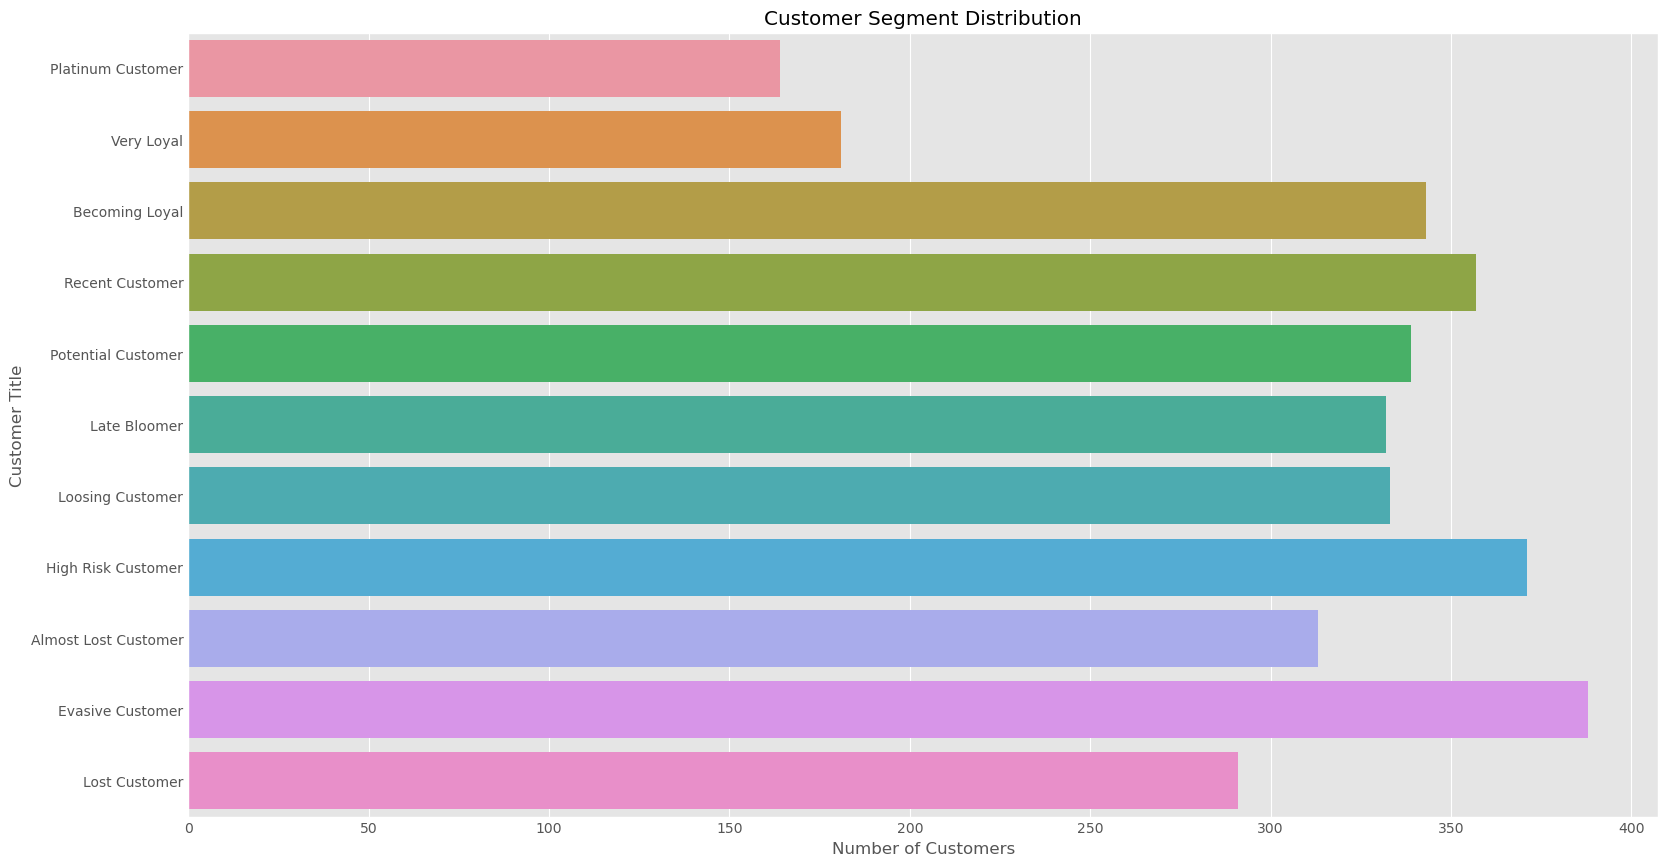

In [163]:
# Plotting the number of customers per title

plt.figure(figsize=(15,8))
sns.barplot(x='Number of Customers', y='cust_detail_title', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Title')
plt.title('Customer Segment Distribution')
plt.show()
